In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import preprocessing

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("DR_Demo_AML_Alert_train.csv")

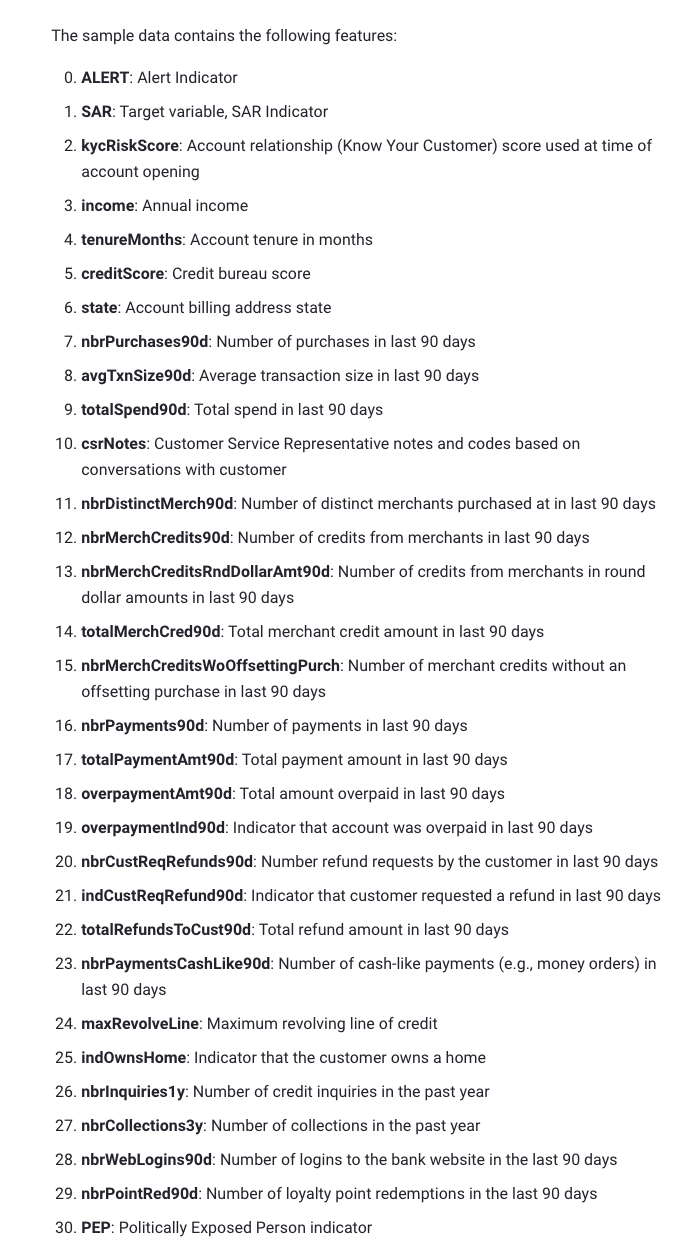

In [3]:
# copying data to another varaible to avoid any changes to original data
ml = data.copy()

In [4]:
ml.shape

(10000, 31)

In [5]:
ml.head(10)

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,state,nbrPurchases90d,avgTxnSize90d,totalSpend90d,...,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,PEP
0,1,0,3,110300.0,5,757,PA,10,153.80,1538.00,...,1,45.82,5,6000,0,3,0,6,1,0
1,1,0,2,107800.0,6,715,NY,22,1.59,34.98,...,1,67.40,0,10000,1,3,0,87,0,0
2,1,0,1,74000.0,13,751,MA,7,57.64,403.48,...,1,450.69,0,10000,0,3,0,6,0,0
3,1,0,0,57700.0,1,659,NJ,14,29.52,413.28,...,1,71.43,0,8000,1,5,0,7,2,0
4,1,0,1,59800.0,3,709,PA,54,115.77,6251.58,...,1,2731.39,3,7000,1,1,0,8,1,0
5,1,0,1,43500.0,11,717,CT,18,36.11,649.98,...,1,26.66,0,9000,0,2,1,3,2,0
6,1,0,0,70200.0,9,720,ME,17,55.38,941.46,...,1,19.89,2,13000,1,4,0,6,1,0
7,1,1,1,5900.0,1,772,MA,0,36.88,0.00,...,1,2758.76,3,11000,0,4,0,3,0,0
8,1,0,1,11400.0,43,727,NY,2,159.05,318.10,...,1,2747.92,3,15000,1,2,0,4,2,0
9,1,0,1,36700.0,12,735,PA,86,37.25,3203.50,...,1,38.12,3,7000,0,8,0,10,0,0


In [6]:
ml.SAR.value_counts()

0    8974
1    1026
Name: SAR, dtype: int64

In [7]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ALERT                             10000 non-null  int64  
 1   SAR                               10000 non-null  int64  
 2   kycRiskScore                      10000 non-null  int64  
 3   income                            9800 non-null   float64
 4   tenureMonths                      10000 non-null  int64  
 5   creditScore                       10000 non-null  int64  
 6   state                             10000 non-null  object 
 7   nbrPurchases90d                   10000 non-null  int64  
 8   avgTxnSize90d                     10000 non-null  float64
 9   totalSpend90d                     10000 non-null  float64
 10  csrNotes                          10000 non-null  object 
 11  nbrDistinctMerch90d               10000 non-null  int64  
 12  nbrMe

In [8]:
ml.nunique()

ALERT                                  1
SAR                                    2
kycRiskScore                           7
income                              1594
tenureMonths                         142
creditScore                          218
state                                  9
nbrPurchases90d                      256
avgTxnSize90d                       8102
totalSpend90d                       8835
csrNotes                            2755
nbrDistinctMerch90d                  155
nbrMerchCredits90d                    46
nbrMerchCreditsRndDollarAmt90d        14
totalMerchCred90d                   5546
nbrMerchCreditsWoOffsettingPurch      26
nbrPayments90d                        11
totalPaymentAmt90d                  7380
overpaymentAmt90d                   2007
overpaymentInd90d                      2
nbrCustReqRefunds90d                   4
indCustReqRefund90d                    1
totalRefundsToCust90d               6181
nbrPaymentsCashLike90d                11
maxRevolveLine  

In [9]:
ml.isnull().sum() # checking missing value

ALERT                                 0
SAR                                   0
kycRiskScore                          0
income                              200
tenureMonths                          0
creditScore                           0
state                                 0
nbrPurchases90d                       0
avgTxnSize90d                         0
totalSpend90d                         0
csrNotes                              0
nbrDistinctMerch90d                   0
nbrMerchCredits90d                    0
nbrMerchCreditsRndDollarAmt90d        0
totalMerchCred90d                     0
nbrMerchCreditsWoOffsettingPurch      0
nbrPayments90d                        0
totalPaymentAmt90d                    0
overpaymentAmt90d                     0
overpaymentInd90d                     0
nbrCustReqRefunds90d                  0
indCustReqRefund90d                   0
totalRefundsToCust90d                 0
nbrPaymentsCashLike90d                0
maxRevolveLine                        0


###### There're 200 missing values from the income variable. Is income missing because the person is unemployed or is this a system error?

In [10]:
count_sar_1 = ml.loc[ml['income'].isnull()]['SAR'].sum()
count_sar_0 = ml.loc[ml['income'].isnull()]['SAR'].count() - count_sar_1
print(count_sar_1)
print(count_sar_0)

20
180


The proportion of SAR in 200 missing value is greater the whole data set, so could fill the missing calue with standard deviation.

In [11]:
std_income = ml['income'].std()
ml['income'] = ml['income'].fillna(std_income)

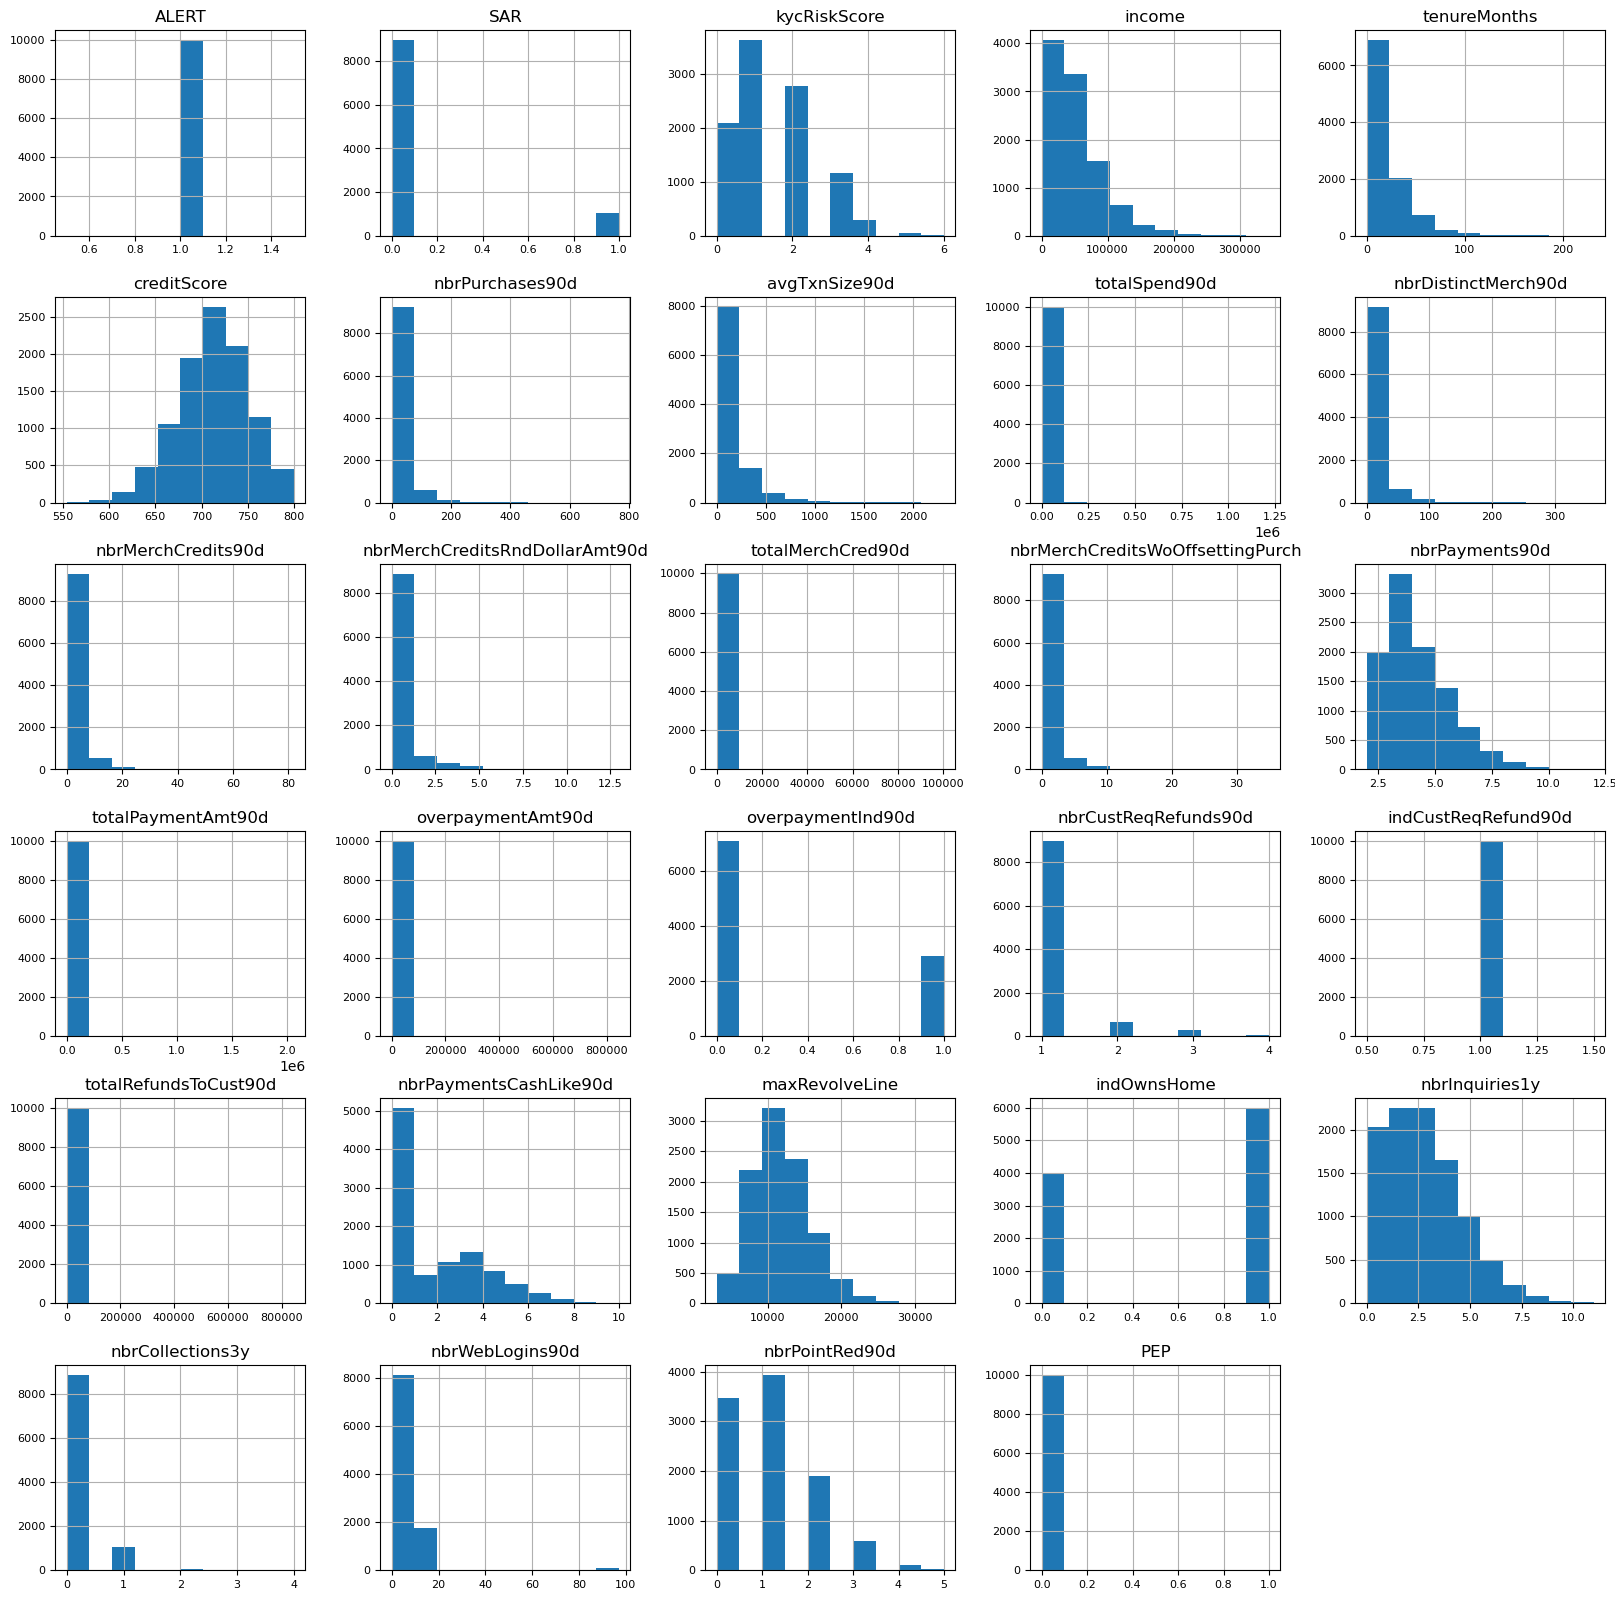

In [12]:
plt_hist = ml.select_dtypes(include='number').hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8)

###### Some features do not provide any useful information because they are all zeroes or have a single value, so we'll drop it

In [13]:
ml = ml.drop(['ALERT', 'PEP','state','csrNotes'], axis=1)

###### Some numerical features can be turned into categorical features

In [14]:
ml['SAR'] = ml['SAR'].astype('category')
ml['overpaymentInd90d'] = ml['overpaymentInd90d'].astype('category')
ml['indOwnsHome'] = ml['indOwnsHome'].astype('category')

In [15]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   SAR                               10000 non-null  category
 1   kycRiskScore                      10000 non-null  int64   
 2   income                            10000 non-null  float64 
 3   tenureMonths                      10000 non-null  int64   
 4   creditScore                       10000 non-null  int64   
 5   nbrPurchases90d                   10000 non-null  int64   
 6   avgTxnSize90d                     10000 non-null  float64 
 7   totalSpend90d                     10000 non-null  float64 
 8   nbrDistinctMerch90d               10000 non-null  int64   
 9   nbrMerchCredits90d                10000 non-null  int64   
 10  nbrMerchCreditsRndDollarAmt90d    10000 non-null  int64   
 11  totalMerchCred90d                 10000 non-null  float

In [16]:
ml.describe()

,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrDistinctMerch90d,nbrMerchCredits90d,nbrMerchCreditsRndDollarAmt90d,...,overpaymentAmt90d,nbrCustReqRefunds90d,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.40790,51237.778864,20.316800,712.851500,26.074900,149.674754,4.019318e+03,13.00890,2.618800,0.529700,...,464.881884,1.141800,1.0,508.909111,1.57240,12024.000000,2.978100,0.120500,7.991400,0.999100
std,1.06058,39435.238829,20.682249,38.316397,40.338798,194.314668,1.631919e+04,20.26242,4.334278,1.100109,...,8667.244229,0.461209,0.0,8667.235341,1.95825,3816.527294,1.727981,0.350702,8.609224,0.945827
min,0.00000,0.000000,0.000000,554.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.0,0.000000,0.00000,3000.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,22500.000000,6.000000,687.000000,4.000000,28.422500,1.599775e+02,2.00000,0.000000,0.000000,...,0.000000,1.000000,1.0,39.257500,0.00000,9000.000000,2.000000,0.000000,5.000000,0.000000
50%,1.00000,40800.000000,14.000000,714.000000,12.000000,82.585000,8.100500e+02,6.00000,1.000000,0.000000,...,0.000000,1.000000,1.0,55.925000,0.00000,12000.000000,3.000000,0.000000,7.000000,1.000000
75%,2.00000,70025.000000,28.000000,739.000000,32.000000,197.067500,3.203580e+03,16.00000,3.000000,1.000000,...,39.682500,1.000000,1.0,73.322500,3.00000,14000.000000,4.000000,0.000000,9.000000,2.000000
max,6.00000,344700.000000,232.000000,800.000000,766.000000,2315.440000,1.218719e+06,362.00000,82.000000,13.000000,...,845122.020000,4.000000,1.0,845158.580000,10.00000,34000.000000,11.000000,4.000000,97.000000,5.000000


# EDA - Univariate analysis

In [17]:
def boxplot_all_variables():
    plt.figure(figsize=(10, 7))
    numerical_cols = ml.select_dtypes(include='number').columns
    for variable in numerical_cols:
        sns.boxplot(data=ml, x="SAR", y=variable, palette="PuBu")
        plt.show()

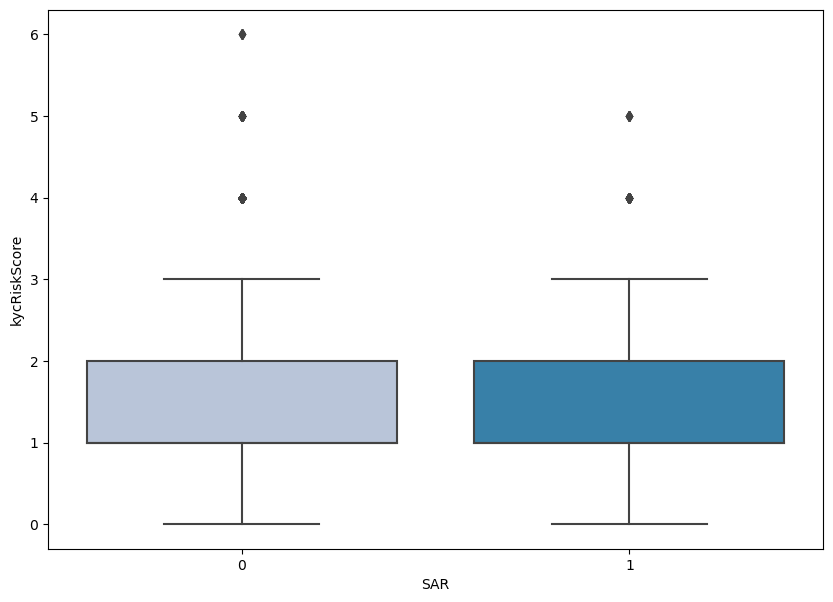

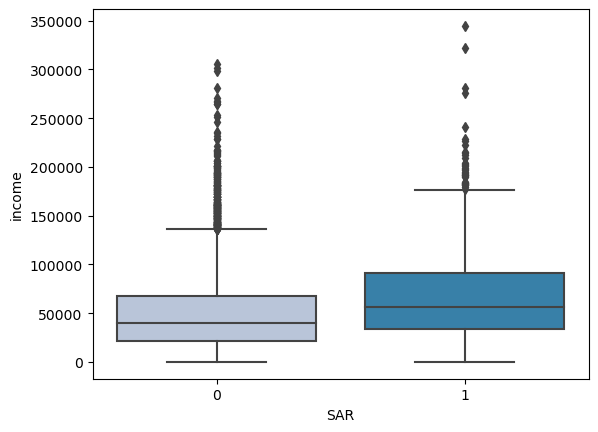

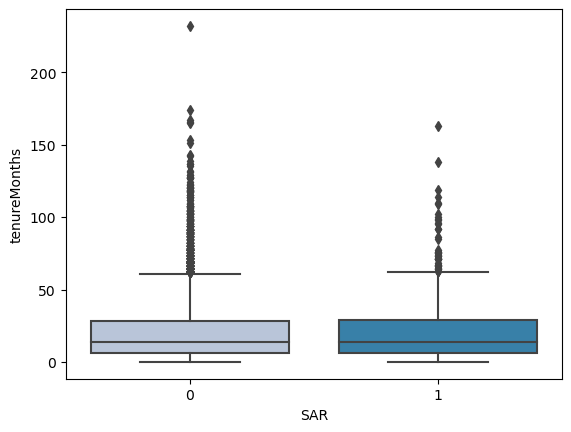

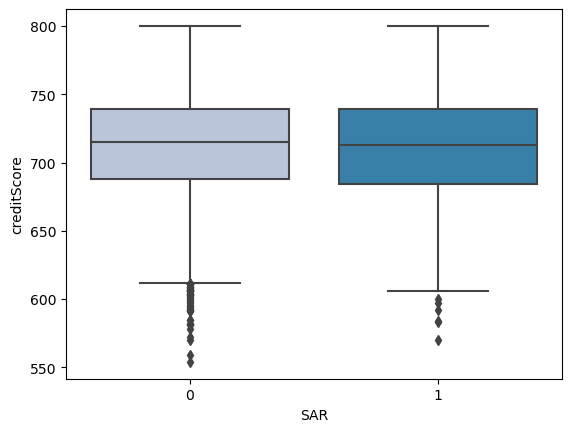

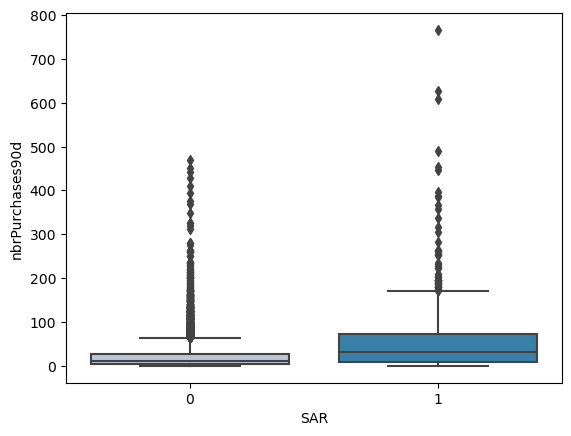

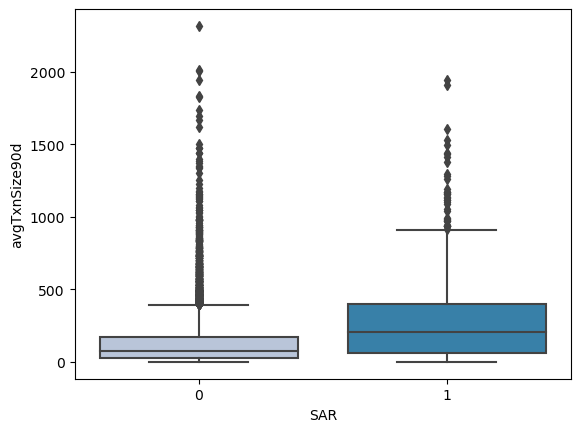

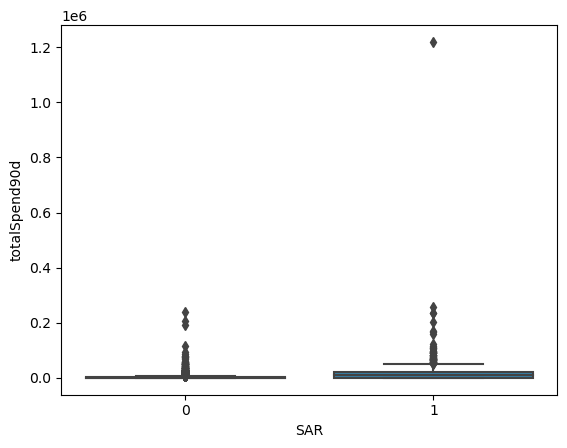

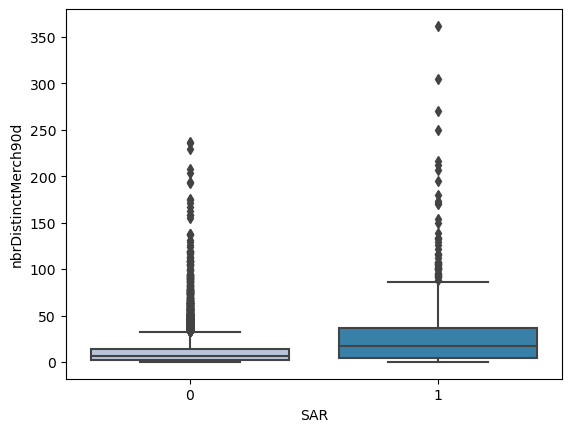

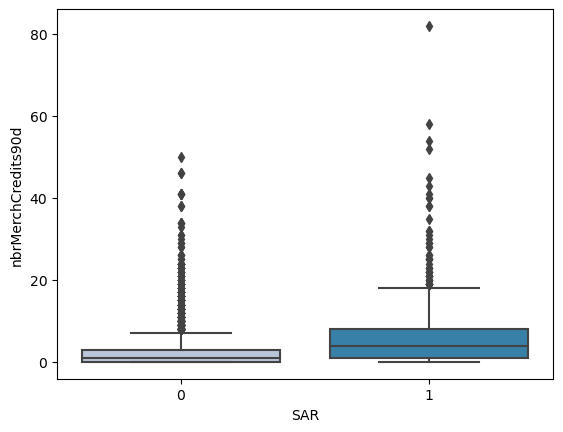

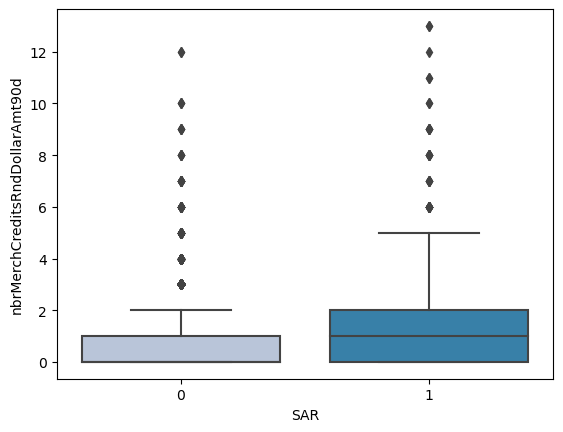

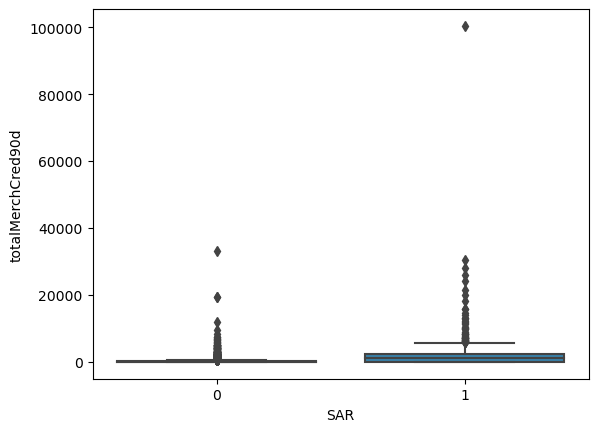

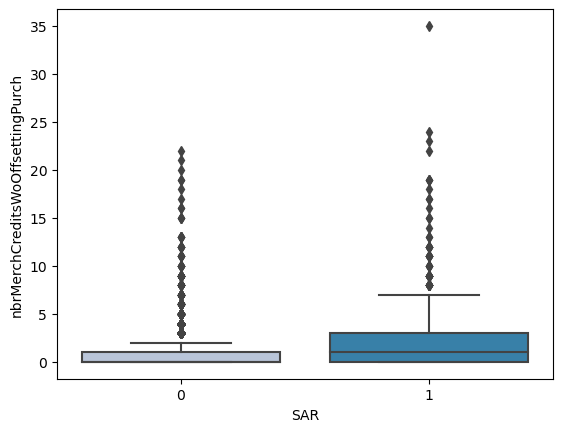

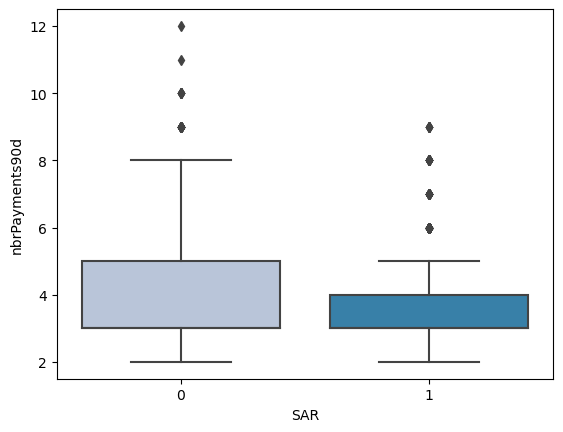

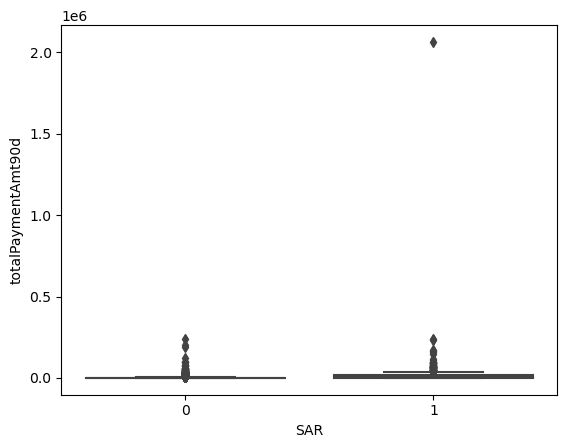

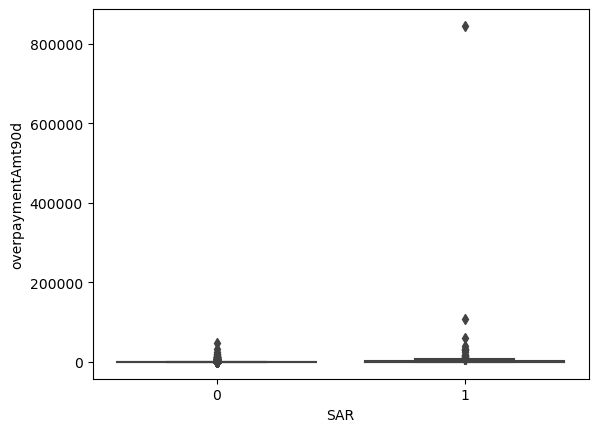

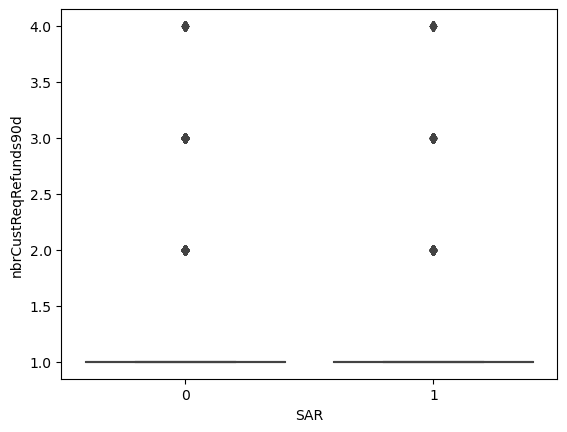

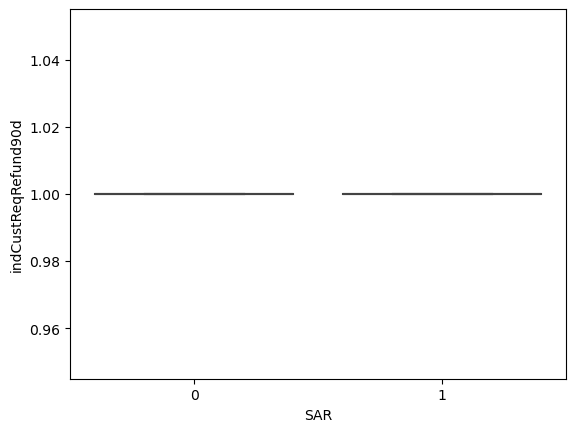

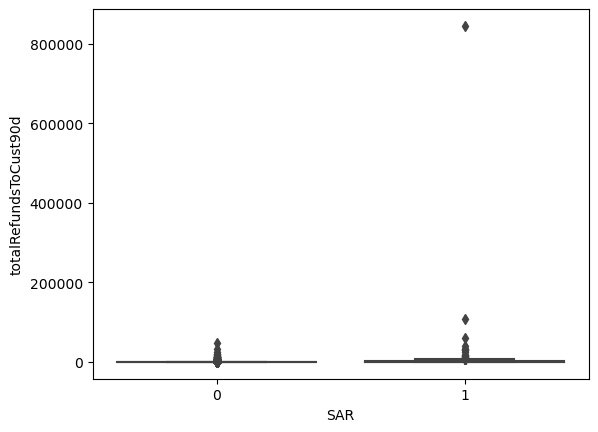

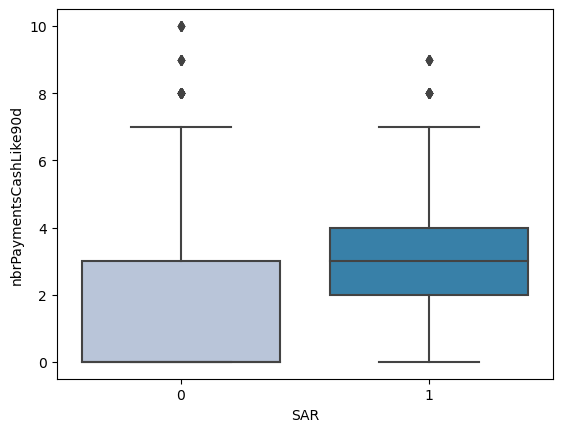

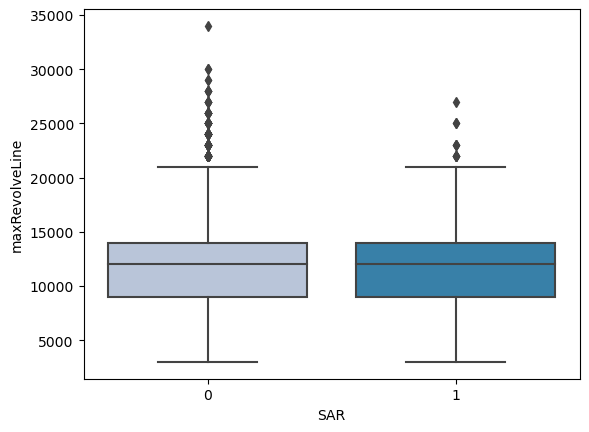

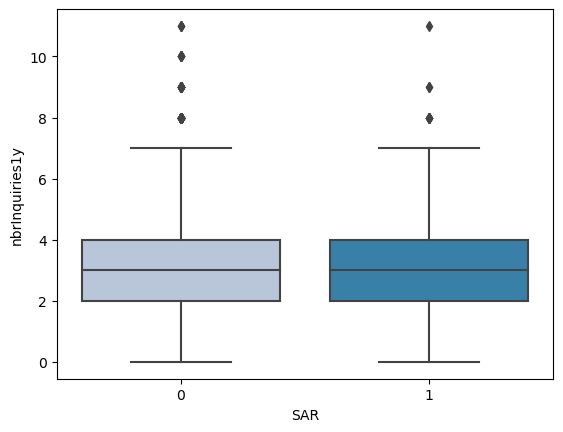

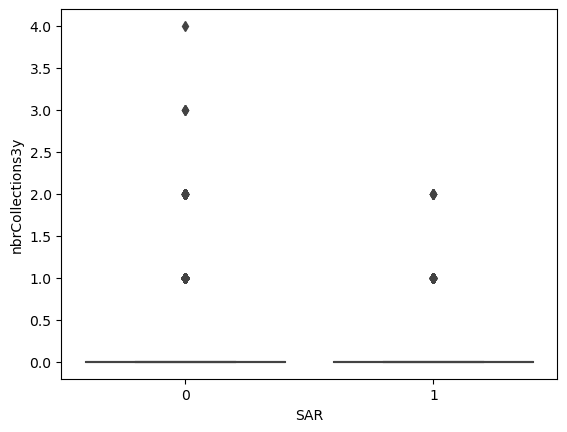

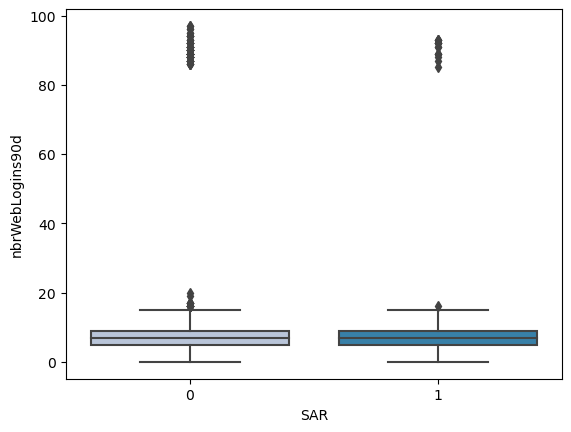

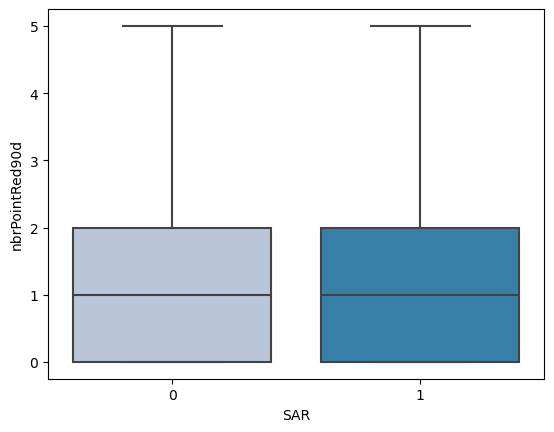

In [18]:
boxplot_all_variables()

##### Account has higher income, nbrpurchases90d,abgTxnsize90d,totalSpend90d, nbrDistinctMerch90d,nbrMerchCredits90d,nbrMerchCreditsRndDollarAmt90d,nbrPaymentsCashLike90d are more likely resulted in a Suspicious Activity Report (SAR) 

In [19]:
data_category = ml[['SAR','overpaymentInd90d', 'indOwnsHome']]

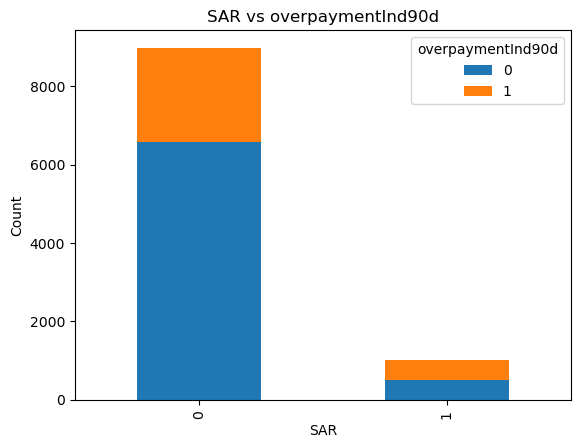

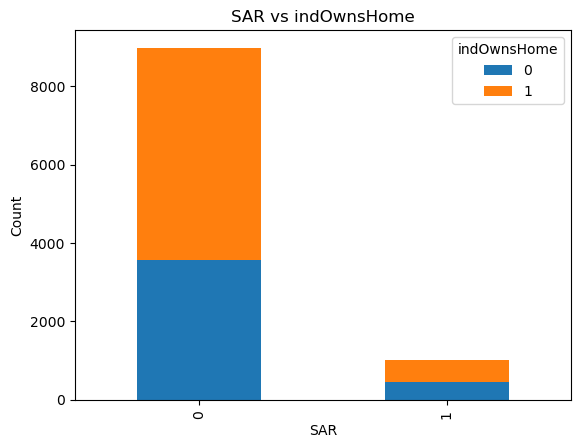

In [20]:
for col in data_category.columns:
    if col != 'SAR':
        ct = pd.crosstab(data_category['SAR'], data_category[col])
        ct.plot(kind='bar', stacked=True)
        plt.xlabel('SAR')
        plt.ylabel('Count')
        plt.title('SAR vs ' + col)
        plt.show()

# Modelling

In [22]:
ml.head(10)

,SAR,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrDistinctMerch90d,nbrMerchCredits90d,...,nbrCustReqRefunds90d,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d
0,0,3,110300.0,5,757,10,153.80,1538.00,7,2,...,1,1,45.82,5,6000,0,3,0,6,1
1,0,2,107800.0,6,715,22,1.59,34.98,11,2,...,2,1,67.40,0,10000,1,3,0,87,0
2,0,1,74000.0,13,751,7,57.64,403.48,4,0,...,2,1,450.69,0,10000,0,3,0,6,0
3,0,0,57700.0,1,659,14,29.52,413.28,7,2,...,1,1,71.43,0,8000,1,5,0,7,2
4,0,1,59800.0,3,709,54,115.77,6251.58,16,7,...,2,1,2731.39,3,7000,1,1,0,8,1
5,0,1,43500.0,11,717,18,36.11,649.98,11,1,...,1,1,26.66,0,9000,0,2,1,3,2
6,0,0,70200.0,9,720,17,55.38,941.46,7,2,...,1,1,19.89,2,13000,1,4,0,6,1
7,1,1,5900.0,1,772,0,36.88,0.00,0,0,...,1,1,2758.76,3,11000,0,4,0,3,0
8,0,1,11400.0,43,727,2,159.05,318.10,1,0,...,2,1,2747.92,3,15000,1,2,0,4,2
9,0,1,36700.0,12,735,86,37.25,3203.50,41,13,...,1,1,38.12,3,7000,0,8,0,10,0


In [23]:
from sklearn.model_selection import train_test_split

X = ml.drop('SAR', axis=1)
y = ml['SAR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 2228 to 235
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   kycRiskScore                      7000 non-null   int64   
 1   income                            7000 non-null   float64 
 2   tenureMonths                      7000 non-null   int64   
 3   creditScore                       7000 non-null   int64   
 4   nbrPurchases90d                   7000 non-null   int64   
 5   avgTxnSize90d                     7000 non-null   float64 
 6   totalSpend90d                     7000 non-null   float64 
 7   nbrDistinctMerch90d               7000 non-null   int64   
 8   nbrMerchCredits90d                7000 non-null   int64   
 9   nbrMerchCreditsRndDollarAmt90d    7000 non-null   int64   
 10  totalMerchCred90d                 7000 non-null   float64 
 11  nbrMerchCreditsWoOffsettingPurch  7000 non-null   int6

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [26]:
# function to create Confusion matrix
def make_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.914667  0.40303   0.692708  0.509579


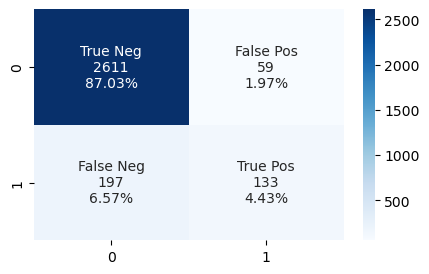

In [114]:
# Fitting the model
rf = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7 },random_state=1)
rf.fit(X_train, y_train)

# Calculating different metrics
rf_model_train_perf = model_performance_classification(rf, X_train, y_train)
print("Training performance:\n", rf_model_train_perf)
rf_model_test_perf = model_performance_classification(rf, X_test, y_test)
print("Testing performance:\n", rf_model_test_perf)

# Creating confusion matrix
make_confusion_matrix(rf, X_test, y_test, figsize=(5, 3))

### Random forest is sort of overfitting and recall is low, We should try to improve the models by tuning the Hyperparameters

### The false negative rate has to be as small as possible. False negatives are the alerts that we determines are not SARs which then turn out to be true SARs. Missing a true SAR is very dangerous and would potentially result in an MRA (matter requiring attention) or regulatory fine.  So we want to Recall to be Maximized.

### Tuning Random Forest

In [109]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}, random_state=1)

parameters = {
    "max_depth": list(np.arange(4, 7, 1)),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.8, 1, 0.1),
    "min_samples_split": np.arange(3, 15, 3),
    "n_estimators": np.arange(20, 40, 20),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.07, 1: 0.93}, max_depth=5,
                       max_features=0.5, max_samples=0.8,
                       min_impurity_decrease=0.01, min_samples_split=3,
                       n_estimators=20, random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.842571  0.997126   0.386845  0.55743
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.837667  0.990909   0.403206  0.573181


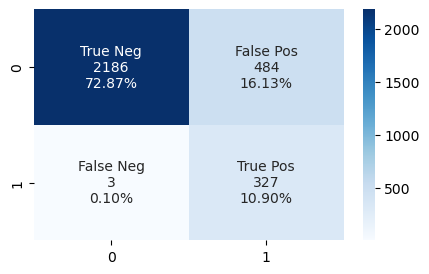

In [115]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
make_confusion_matrix(rf_tuned, X_test, y_test, figsize=(5, 3))

## After turning the random forest model, it appears that the model is performing well with an accuracy of 84% and a recall of 99%. This means that the model is able to correctly identify a high percentage of SAR cases and has a good overall accuracy in predicting whether an alert will result in a SAR.

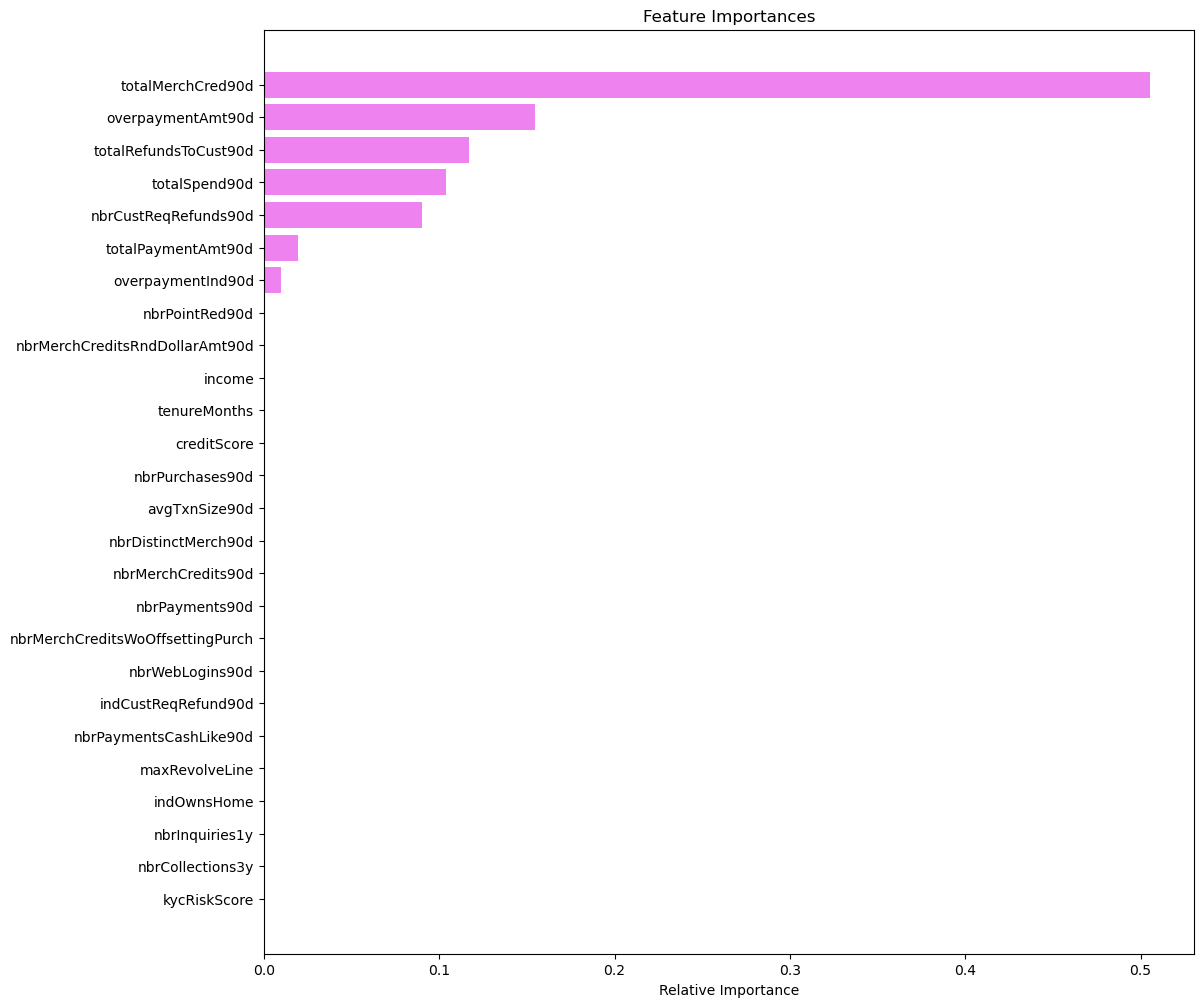

In [36]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The analysis of the feature importance suggests that certain variables have a stronger impact on the prediction of SAR. The most important feature is "totalMerchCred90d," followed by "overpaymentAmt90d," "totalRefundsToCust90d," "totalSpend90d," and "nbrCustReqRefunds90d." These features play a significant role in determining whether an alert is likely to result in a SAR.

# Feature Effects

In [120]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

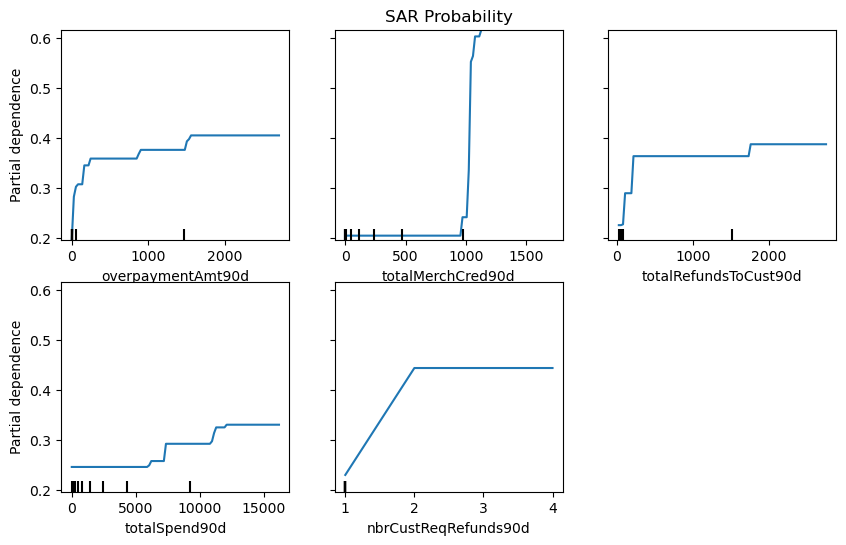

In [129]:
# Define the feature names for which you want to plot the partial dependence
feature_names = ['overpaymentAmt90d', 'totalMerchCred90d','totalRefundsToCust90d','totalSpend90d','nbrCustReqRefunds90d']

# Get the feature indices from the feature names
feature_indices = [X_train.columns.get_loc(feature_name) for feature_name in feature_names]

# Create the partial dependence plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(rf_tuned, X_train, features=feature_indices, ax=ax)
ax.set_title("SAR Probability")
ax.set_xlabel("Feature Value")
ax.set_ylabel("SAR Probability")

plt.show()

### The graphs depicts how the likelihood of being a SAR changes when the input feature takes different values

# Compute predictions

In [144]:
# Make predictions on the training set
y_train_pred = rf_tuned.predict(X_train)
y_train_proba = rf_tuned.predict_proba(X_train)[:, 1]  # Probability of class 1 (SAR)

# Make predictions on the test set
y_test_pred = rf_tuned.predict(X_test)
y_test_proba = rf_tuned.predict_proba(X_test)[:, 1]  # Probability of class 1 (SAR)

# Create a new DataFrame with the original features and the predicted values
results_test = X_test.copy()
results_test['SAR'] = y_test
results_test['Prediction'] = y_test_pred
results_test['Positive_Probability'] = y_test_proba

# Print the results DataFrame for the test set
print("\nResults for the Test Set:")
results_test.head(10)



Results for the Test Set:


,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrDistinctMerch90d,nbrMerchCredits90d,nbrMerchCreditsRndDollarAmt90d,...,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,SAR,Prediction,Positive_Probability
9953,1,2400.0,6,734,0,199.13,0.00,0,0,0,...,0,16000,1,3,0,3,1,0,0,0.190829
3850,0,100800.0,13,702,7,256.27,1793.89,4,2,0,...,3,14000,1,2,0,9,1,0,0,0.062712
4962,1,51400.0,5,707,2,112.76,225.52,1,0,0,...,0,17000,0,3,0,9,1,0,0,0.005085
3886,1,19600.0,35,717,5,11.67,58.35,4,1,0,...,3,14000,1,0,0,9,0,0,1,0.854094
5437,1,48100.0,9,669,20,4.07,81.40,8,1,0,...,0,10000,0,2,0,4,2,0,0,0.005085
8517,2,35100.0,21,724,9,150.31,1352.79,6,0,0,...,0,9000,1,4,0,5,2,0,0,0.005085
2041,3,86100.0,10,670,17,134.21,2281.57,10,0,0,...,0,26000,1,1,1,9,1,0,1,0.686653
1989,2,46600.0,3,727,16,67.84,1085.44,10,0,0,...,0,8000,1,6,0,7,1,0,0,0.004017
1933,5,154000.0,13,704,57,1294.00,73758.00,25,5,2,...,6,11000,0,3,0,4,0,1,1,0.935567
9984,4,91400.0,4,704,91,239.28,21774.48,49,13,1,...,3,11000,0,2,0,9,0,0,1,0.935567


#### As the positive_probability approaches zero, the row is a stronger candidate for the alert is not SAR.
#### As positive_probability approaches one, the outcome is more likely to the alert is SAR.

# Conclusion

### Transactions involving high amounts of merchant credits, overpayment, refunds to customers, and overall spending are more likely to trigger a SAR. The presence of a higher number of customer refund requests also indicates a potential suspicious activity.

### Based on the model's performance and feature importance, it can be used to effectively identify suspicious activities that may lead to SARs. This can assist in the detection and prevention of financial crimes, enabling institutions to take appropriate actions and investigate further when alerts with similar characteristics arise. The model can be integrated into existing systems or processes and assign a suspicious activity score to future alerts to automate the identification of potential SAR cases, enhancing the efficiency and effectiveness of anti-money laundering and fraud detection efforts.